<a href="https://colab.research.google.com/github/chhak2021/Colab/blob/main/7_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
날짜 : 2021/07/14
이름 : 김철학
내용 : 텐서플로 RNN 실습하기
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
tf.__version__

'2.5.0'

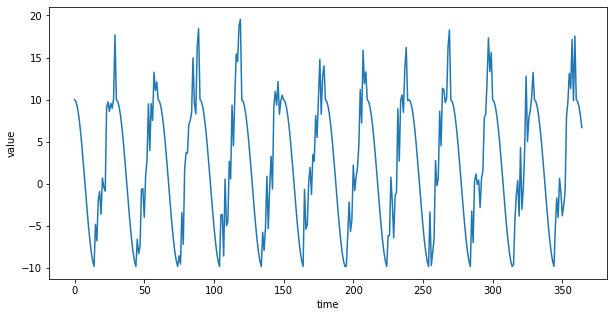

In [28]:
# 시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time), 
                            np.cos(2 * np.pi * month_time) + np.random.random(365))

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [ ]:
time_series

In [30]:
# RNN학습을 위한 데이터 전처리

def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):

    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)


train_data, train_label = make_sequence(time_series, 10)

# 데이터셋 구조변환
train_data = train_data.reshape(-1, 10, 1) # -1 자동을 의미, 자동 x 10 x 1
train_label = train_label.reshape(-1, 1)

print(train_data.shape)

# 학습데이터, 테스트 데이터
_train_data  = train_data[:300]
_train_label = train_label[:300]

_test_data  = train_data[300:]
_test_label = train_label[300:]



(355, 10, 1)


In [31]:
# 학습 모델 설계
model = Sequential()

model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모델 설정
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [37]:
#모델 학습하기
model.fit(_train_data, _train_label, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3077 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2217 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1787 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1850 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1639 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1627 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1520 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1538 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1972 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2030 - acc: 0.0000e+00
Epoch 11/100
10/10 

In [38]:
#성능평가
model.evaluate(_test_data, _test_label)

2/2 [==============================] - 0s 6ms/step - loss: 8.5878 - acc: 0.0000e+00


[8.587831497192383, 0.0]

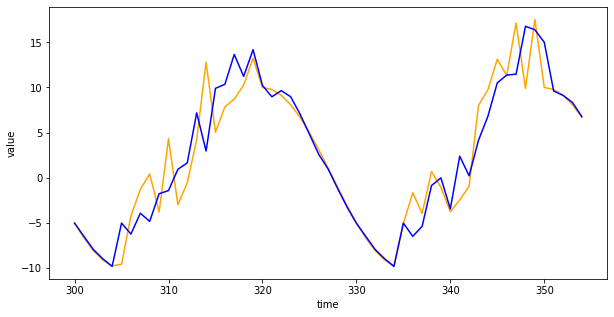

In [41]:
#모델 평가하기
result = model.predict(_test_data)
result_range = np.arange(len(_train_label), len(_train_label) + len(result))

result_range

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='orange', label='label')
plt.plot(result_range, result, color='blue', label='result')
plt.show()

In [ ]:
}